# A1: Neuron Models

## Prelims

In [23]:
from google.colab import files
uploaded = files.upload()

Saving ans.py to ans (2).py
Saving neuron_models.py to neuron_models (3).py


In [41]:
import numpy as np
import matplotlib.pyplot as plt

import neuron_models as nm
import ans as ans

from neuron_models import SpikingNetwork, SpikingNeuron, InputNeuron, generate_spike_train

# These next two lines automatically reload the imports if they are changed.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Q3: Two LIF Neurons

## (a)

In [42]:
#=========== YOUR CODE (start) ===========
#YOUR CODE HERE
# Initialize the network
net = SpikingNetwork()

# Create LIF neurons
LIF_A = SpikingNeuron(label='LIF A')
LIF_B = SpikingNeuron(label='LIF B')

# Set their refractory periods
LIF_A.tau_ref = 0.01
LIF_B.tau_ref = 0.01

# Add neurons to the network
net.add_neuron(LIF_A)
net.add_neuron(LIF_B)

# Connect the two neurons
LIF_A.connect_to(LIF_B, 0.07)
LIF_B.connect_to(LIF_A, 0.07)

# Create input neurons
InA = InputNeuron(generate_spike_train([[0, 0], [1.2, 50], [1.3, 0]]), label='InA')
InB = InputNeuron(generate_spike_train([[0, 40], [0.1, 0]]), label='InB')

# Add input neurons to the network
net.add_neuron(InA)
net.add_neuron(InB)

# Connect inputs to LIF neurons
InA.connect_to(LIF_A, -0.6)
InB.connect_to(LIF_B, 0.3)

#=========== YOUR CODE (end) ===========

## (b)

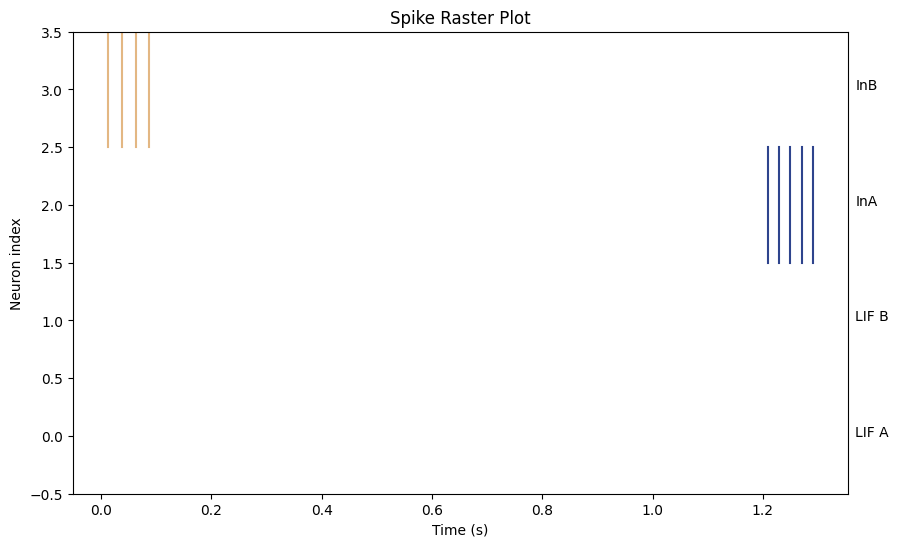

In [37]:
#=========== YOUR CODE (start) ===========
# Simulate the network for 2 seconds with a time step of 1 ms
net.simulate(T=2.0, dt=0.001)

# Plot the spike raster
plt.figure(figsize=(10, 6))
net.spike_raster()
plt.title("Spike Raster Plot")
plt.show()
#=========== YOUR CODE (end) ===========

# Q4: LIF Firing Rate Experiment

## (a)

In [43]:
#=========== YOUR CODE (start) ===========
#YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
from neuron_models import SpikingNetwork, InputNeuron, generate_spike_train, spikes_between

# Define custom LIFNeuron class inline
class LIFNeuron():
    def __init__(self, Tau_m=0.01, Tau_ref=0.005, Tau_s=0.3, label=None):
        self.Tau_m = Tau_m
        self.Tau_ref = Tau_ref
        self.Tau_s = Tau_s
        self.label = label
        self.v = 0.0
        self.refractory_time = 0.0
        self.spikes = []

    def step(self, I, dt, t):
        """
        Advance the state of the neuron by one time step.
        :param I: Input current (A.U.)
        :param dt: Time step (s)
        :param t: Current time (s)
        """
        if self.refractory_time > 0:
            self.refractory_time -= dt
            self.v = 0.0
        else:
            dv = (-self.v + I) / self.Tau_m
            self.v += dv * dt

            if self.v >= 1.0:
                self.spikes.append(t)
                self.v = 0.0
                self.refractory_time = self.Tau_ref

    def get_spikes(self):
        return self.spikes


# Parameters
N = 50
Tau_m = 0.01
Tau_s = 0.3
Tau_ref = 0.005
input_rate = 20
T = 2
dt = 0.001
weights = np.linspace(0, 20 / (3 * N), N)

# Create the input spike train
input_spike_train = generate_spike_train([[0, input_rate]])

# Initialize neurons
lif_neurons = [LIFNeuron(Tau_m=Tau_m, Tau_ref=Tau_ref, Tau_s=Tau_s, label=f"Neuron {i}") for i in range(N)]

#=========== YOUR CODE (end) ===========

## (b)

In [44]:
#=========== YOUR CODE (start) ===========
#YOUR CODE HERE
# Simulation
spike_counts = np.zeros(N)
time = np.arange(0, T, dt)
for t in time:
    for i, neuron in enumerate(lif_neurons):
        # Compute input current as weight × spike rate
        I = weights[i] * input_rate
        neuron.step(I, dt, t)

# Calculate firing rates
firing_rates = []
for neuron in lif_neurons:
    spike_count = spikes_between(neuron.get_spikes(), 1, 2)  # Count spikes between t=1 and t=2
    firing_rate = spike_count / (2 - 1)  # Spikes per second
    firing_rates.append(firing_rate)

# Calculate input currents
input_currents = weights * input_rate  # Current = weight × input rate

print("the firing rates are:", firing_rates)
print("the input current is:", input_currents)

#=========== YOUR CODE (end) ===========

the firing rates are: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 26.0, 35.0, 40.0, 44.0, 48.0, 53.0, 56.0, 58.0, 63.0, 63.0, 66.0, 72.0, 72.0, 72.0, 77.0, 77.0, 77.0, 84.0, 84.0, 84.0, 84.0, 91.0, 91.0, 91.0, 91.0, 91.0, 100.0, 100.0, 100.0, 100.0, 100.0]
the input current is: [0.         0.05442177 0.10884354 0.16326531 0.21768707 0.27210884
 0.32653061 0.38095238 0.43537415 0.48979592 0.54421769 0.59863946
 0.65306122 0.70748299 0.76190476 0.81632653 0.8707483  0.92517007
 0.97959184 1.03401361 1.08843537 1.14285714 1.19727891 1.25170068
 1.30612245 1.36054422 1.41496599 1.46938776 1.52380952 1.57823129
 1.63265306 1.68707483 1.7414966  1.79591837 1.85034014 1.9047619
 1.95918367 2.01360544 2.06802721 2.12244898 2.17687075 2.23129252
 2.28571429 2.34013605 2.39455782 2.44897959 2.50340136 2.55782313
 2.6122449  2.66666667]


## (c)

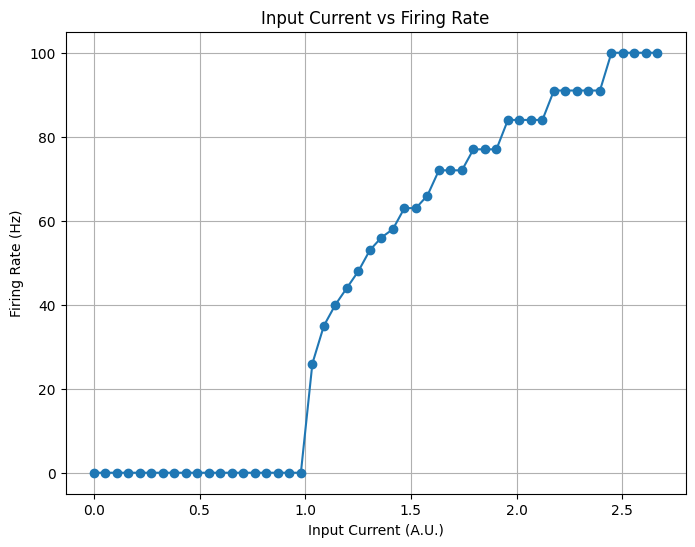

In [45]:
#=========== YOUR CODE (start) ===========
#YOUR CODE HERE
# Plot input current vs firing rate
plt.figure(figsize=(8, 6))
plt.plot(input_currents, firing_rates, marker='o', linestyle='-')
plt.xlabel("Input Current (A.U.)")
plt.ylabel("Firing Rate (Hz)")
plt.title("Input Current vs Firing Rate")
plt.grid(True)
plt.show()
#=========== YOUR CODE (end) ===========